In [5]:
%matplotlib inline

from __future__ import division

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

In [248]:
F_max = 30.0
N = 100
sigma = 6.0

def f(v):
    return round(v * N)

def f_inv(x):
    return x / N

def fill(population, v):
    for i in xrange(-N, N * 2):
        d = i - f(v)
        if i < 0:
            x = F_max * math.exp(-1 * ((d**2) / (2.0 * (sigma**2))))
            population[N + i] = max(x, population[N + i])
        elif i >= N:
            x = F_max * math.exp(-1 * ((d**2) / (2.0 * (sigma**2))))
            population[i - N] = max(x, population[i - N])
        else:
            x = F_max * math.exp(-1 * ((d**2) / (2.0 * (sigma**2))))
            population[i] = max(x, population[i])

def vote(population):
    num = 0.0;
    for i in range(0, N):
        num += f_inv(i) * population[i]

    den = 0.0
    for i in range(0, N):
        den += population[i]

    return num / den

In [249]:
population = np.zeros(N)

In [253]:
fill(population, 1.0)

In [254]:
print vote(population)

0.615520651619


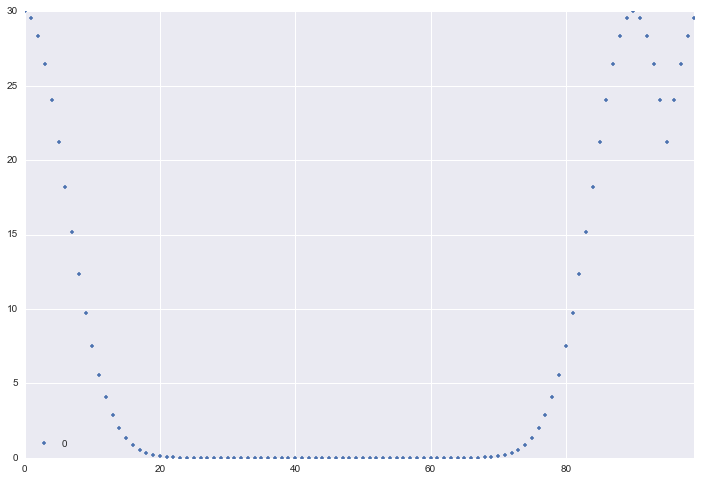

In [255]:
df = pd.DataFrame(population)
df.plot(kind="line", figsize=(12, 8), style=".")